In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update(plt.rcParamsDefault)
#matplotlib.rcParams['mathtext.fontset'] = 'cm'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'

#Direct input
#plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.titlesize":10
}
plt.rcParams.update(tex_fonts)

# font is  \OT1/cmr/m/n/10.95
#matplotlib.rcParams['font.serif'] = ['Courier']

# textwidth in latex in inches
TEXTWIDTH = 5.7885

plt.rcParams['xtick.major.pad']='1.5'
plt.rcParams['ytick.major.pad']='1'

In [2]:
def compute_mean_std(y_data):
    """
    Plots the average over all ys as bold line and standart deviation as shaded area
    Each entry in y_array list will become one line
    :param y_data: data to take mean and std of
    """
    mean = np.mean(y_data, axis=0)
    std = np.std(y_data, axis=0)

    return mean, std


In [3]:
def gather_data(path, x, idx):
    """
    Gather data, to the corresponding x-data until idx
    """
    y_data_returns = np.zeros((len(path), x.shape[0]))
    y_data_succ = np.zeros((len(path), x.shape[0]))

    for i in range(len(path)):
        data = np.load(path[i], mmap_mode='r')
        #for k in data.keys():
        #    print(f" key = {k}\n {data[k]}")

        # take mean over 10 eval episodes of one run
        returns = data["results"][idx]
        success_rate = returns.copy()
        success_rate[np.where(returns > 0)] = 1
        success_rate[np.where(returns < 0)] = -1

        mean_return = np.sum(returns, axis=1) / data["results"].shape[1] # average over number of eval episodes
        success_rate = np.sum(success_rate, axis=1) / data["results"].shape[1] # average over number of eval episodes

        # gather values of different runs
        y_data_returns[i] = mean_return
        y_data_succ[i] = success_rate

    return y_data_returns, y_data_succ


# **Comparison Influence of Reward Types**

In [10]:
path_sparse_2x2_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed123456/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed126224/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed214779/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed285719/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed487193/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed495813/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed582759/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed682147/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed918504/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed978623/evaluations.npz"]

# neg dist multiplied with 5
#path_negdist_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed123456/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed126224/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed214779/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed285719/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed487193/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed495813/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed582759/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed682147/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed918504/evaluations.npz",
#                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/skill_conditioned_2x2_2skills_num_skills8_neg_distTrue_movementFalse_reward_on_changeFalse_sparseFalse_seed978623/evaluations.npz"]


# 0.5 * neg dist
path_negdist_2x2_2skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_2skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623/evaluations.npz"]

In [11]:
path_negdist_2x2_8skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                    "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x2/2x2_8skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623/evaluations.npz"]

In [12]:
path_sparse_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed285719/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed487193/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed495813/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed582759/evaluations.npz"]

# 0.5 * negdist
path_negdist_2x3_3skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz","/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/2x3/2x3_3skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz"]

In [27]:
path_sparse_3x3_4skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distFalse_movementFalse_sparseTrue_seed978623/evaluations.npz"]

path_negdist_3x3_4skills = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed123456/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed126224/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed214779/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed285719/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed487193/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed495813/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed582759/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed682147/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed918504/evaluations.npz",
                           "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_predefined/3x3/3x3_4skills_predefined_neg_distTrue_movementFalse_sparseFalse_seed978623/evaluations.npz"]

In [28]:
x1 = np.load(path_sparse_2x2_2skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x1 <= 150000)
x1 = x1[idx]

returns_sparse_2x2_2skills, succ_sparse_2x2_2skills = gather_data(path_sparse_2x2_2skills, x1, idx)
returns_negdist_2x2_2skills, succ_negdist_2x2_2skills = gather_data(path_negdist_2x2_2skills, x1, idx)
returns_negdist_2x2_8skills, succ_negdist_2x2_8skills = gather_data(path_negdist_2x2_8skills, x1, idx)

mean_succ_sparse_2x2_2skills, std_succ_sparse_2x2_2skills = compute_mean_std(succ_sparse_2x2_2skills)
mean_succ_negdist_2x2_2skills, std_succ_negdist_2x2_2skills = compute_mean_std(succ_negdist_2x2_2skills)
mean_succ_negdist_2x2_8skills, std_succ_negdist_2x2_8skills = compute_mean_std(succ_negdist_2x2_8skills)

In [29]:
x2 = np.load(path_sparse_2x3_3skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x2 <= 190000)
x2 = x2[idx]

returns_sparse_2x3_3skills, succ_sparse_2x3_3skills = gather_data(path_sparse_2x3_3skills, x2, idx)
returns_negdist_2x3_3skills, succ_negdist_2x3_3skills = gather_data(path_negdist_2x3_3skills, x2, idx)

mean_succ_sparse_2x3_3skills, std_succ_sparse_2x3_3skills = compute_mean_std(succ_sparse_2x3_3skills)
mean_succ_negdist_2x3_3skills, std_succ_negdist_2x3_3skills = compute_mean_std(succ_negdist_2x3_3skills)

In [34]:
x3 = np.load(path_sparse_3x3_4skills[0], mmap_mode='r')["timesteps"]
idx = np.where(x3 <= 190000)
x3 = x3[idx]

returns_sparse_3x3_4skills, succ_sparse_3x3_4skills = gather_data(path_sparse_3x3_4skills, x3, idx)
returns_negdist_3x3_4skills, succ_negdist_3x3_4skills = gather_data(path_negdist_3x3_4skills, x3, idx)

mean_succ_sparse_3x3_4skills, std_succ_sparse_3x3_4skills = compute_mean_std(succ_sparse_3x3_4skills)
mean_succ_negdist_3x3_4skills, std_succ_negdist_3x3_4skills = compute_mean_std(succ_negdist_3x3_4skills)

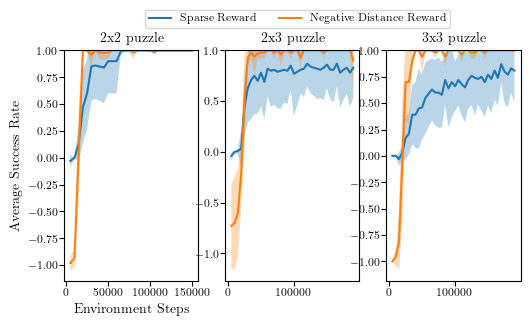

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(TEXTWIDTH +0.1, TEXTWIDTH * (5**.5 - 1.2) / 2))

# 2x2 puzzle
# 2 skills
ax[0].plot(x1, mean_succ_sparse_2x2_2skills, label="Sparse Reward")
ax[0].fill_between(x1, mean_succ_sparse_2x2_2skills + std_succ_sparse_2x2_2skills, mean_succ_sparse_2x2_2skills - std_succ_sparse_2x2_2skills, alpha=0.3)

ax[0].plot(x1, mean_succ_negdist_2x2_2skills, label="Negative Distance Reward")
ax[0].fill_between(x1, mean_succ_negdist_2x2_2skills + std_succ_negdist_2x2_2skills, mean_succ_negdist_2x2_2skills - std_succ_negdist_2x2_2skills, alpha=0.3)

# 8 skills
#ax[0].plot(x1, mean_succ_negdist_2x2_8skills, label="Negative Distance Reward 2x2 with 8 skills")
#ax[0].fill_between(x1, mean_succ_negdist_2x2_8skills + std_succ_negdist_2x2_8skills, mean_succ_negdist_2x2_8skills - std_succ_negdist_2x2_8skills, alpha=0.3)

# 2x3 puzzle
ax[1].plot(x2, mean_succ_sparse_2x3_3skills, label="Sparse Reward")
ax[1].fill_between(x2, mean_succ_sparse_2x3_3skills + std_succ_sparse_2x3_3skills, mean_succ_sparse_2x3_3skills - std_succ_sparse_2x3_3skills, alpha=0.3)

ax[1].plot(x2, mean_succ_negdist_2x3_3skills, label="Negative Distance Reward")
ax[1].fill_between(x2, mean_succ_negdist_2x3_3skills + std_succ_negdist_2x3_3skills, mean_succ_negdist_2x3_3skills - std_succ_negdist_2x3_3skills, alpha=0.3)

# 3x3 puzzle
ax[2].plot(x3, mean_succ_sparse_3x3_4skills, label="Sparse Reward")
ax[2].fill_between(x3, mean_succ_sparse_3x3_4skills + std_succ_sparse_3x3_4skills, mean_succ_sparse_3x3_4skills - std_succ_sparse_3x3_4skills, alpha=0.3)

ax[2].plot(x3, mean_succ_negdist_3x3_4skills, label="Negative Distance Reward")
ax[2].fill_between(x3, mean_succ_negdist_3x3_4skills + std_succ_negdist_3x3_4skills, mean_succ_negdist_3x3_4skills - std_succ_negdist_3x3_4skills, alpha=0.3)


ax[0].set_ylim(top=1.)
ax[1].set_ylim(top=1.)
ax[2].set_ylim(top=1.)
ax[0].set_title("2x2 puzzle")
ax[1].set_title("2x3 puzzle")
ax[2].set_title("3x3 puzzle")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax[i, j].locator_params(axis='y', nbins=3)

ax[0].set_xlabel('Environment Steps')
ax[0].set_ylabel('Average Success Rate')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
plt.savefig("Comparison-Reward_Shaping.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

# **Comparison of Puzzle Sizes**

In [20]:
path_1x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/1x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

path_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x2_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

path_2x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/2x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

path_3x3 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed12345/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed25971/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed19471/evaluations.npz",
            "/home/rosa/Documents/Uni/Masterarbeit/checkpoints/3x3_neg_distTrue_movementFalse_reward_on_changeTrue_sparseFalse_seed47581/evaluations.npz"]

In [21]:
x = np.load(path_3x3[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 2230000)
x = x[idx]

returns_1x2, succ_1x2 = gather_data(path_1x2, x, idx)
returns_2x2, succ_2x2 = gather_data(path_2x2, x, idx)
returns_2x3, succ_2x3 = gather_data(path_2x3, x, idx)
returns_3x3, succ_3x3 = gather_data(path_3x3, x, idx)

mean_succ_1x2, std_succ_1x2 = compute_mean_std(x, succ_1x2)
mean_succ_2x2, std_succ_2x2 = compute_mean_std(x, succ_2x2)
mean_succ_2x3, std_succ_2x3 = compute_mean_std(x, succ_2x3)
mean_succ_3x3, std_succ_3x3 = compute_mean_std(x, succ_3x3)

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH +0.1, TEXTWIDTH * (5**.5 - 1.2) / 2))

ax.plot(x, mean_succ_1x2, label="1x2 Puzzle")
ax.fill_between(x, mean_succ_1x2 + std_succ_1x2, mean_succ_1x2 - std_succ_1x2, alpha=0.3)

ax.plot(x, mean_succ_2x2, label="2x2 Puzzle")
ax.fill_between(x, mean_succ_2x2 + std_succ_1x2, mean_succ_2x2 - std_succ_2x2, alpha=0.3)

ax.plot(x, mean_succ_2x3, label="2x3 Puzzle")
ax.fill_between(x, mean_succ_2x3 + std_succ_2x3, mean_succ_2x3 - std_succ_2x3, alpha=0.3)

ax.plot(x, mean_succ_3x3, label="3x3 Puzzle")
ax.fill_between(x, mean_succ_3x3 + std_succ_3x3, mean_succ_3x3 - std_succ_3x3, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("Sparse and Neg Dist Reward")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax[i, j].locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Average Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
plt.savefig("Comparison-PuzzleSize.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

# **Comparison of Observation Spaces**

In [38]:
path_coor = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed123456/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed126224/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed214779/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed285719/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed487193/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed495813/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed582759/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed682147/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed918504/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed978623/evaluations.npz"]

path_nocoor = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed123456/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed126224/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed214779/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed285719/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed487193/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed495813/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed582759/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed682147/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed918504/evaluations.npz",
             "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_no-coord_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse_seed978623/evaluations.npz"]

In [39]:
x = np.load(path_coor[0], mmap_mode='r')["timesteps"]
idx_coor = np.where(x <= 172000)
x_coor = x[idx_coor]

x = np.load(path_nocoor[0], mmap_mode='r')['timesteps']
idx_nocoor = np.where(x <= 182000)
x_nocoor = x[idx_nocoor]
print(x_nocoor[-1])

returns_coor, succ_coor = gather_data(path_coor, x_coor, idx_coor)
returns_nocoo, succ_nocoor = gather_data(path_nocoor, x_nocoor, idx_nocoor)

mean_succ_coor, std_succ_coor = compute_mean_std(succ_coor)
mean_succ_nocoor, std_succ_nocoor = compute_mean_std(succ_nocoor)

182000


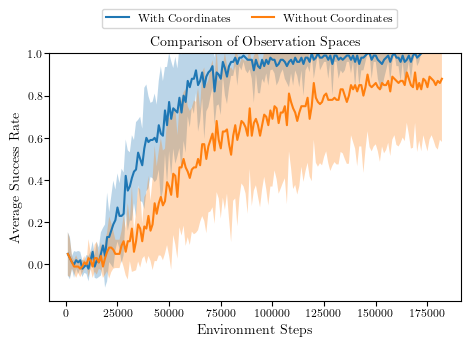

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(0.9 * TEXTWIDTH +0.1, 0.9 * TEXTWIDTH * (5**.5 - 1) / 2))

ax.plot(x_coor, mean_succ_coor, label="With Coordinates")
ax.fill_between(x_coor, mean_succ_coor + std_succ_coor, mean_succ_coor - std_succ_coor, alpha=0.3)

ax.plot(x_nocoor, mean_succ_nocoor, label="Without Coordinates")
ax.fill_between(x_nocoor, mean_succ_nocoor + std_succ_nocoor, mean_succ_nocoor - std_succ_nocoor, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("Comparison of Observation Spaces")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax.locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Average Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
plt.savefig("Comparison-Obs-Space.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

## **Dict vs. flat Box**

In [41]:
path_flat_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_flatBox_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_flatBox_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed487193/evaluations.npz"]

path_dict_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_dict_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed123456/evaluations.npz",
                 "/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_dict_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed487193/evaluations.npz"]


In [42]:
x = np.load(path_flat_2x2[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 160000)
x = x[idx]

print(x)

returns_flat, succ_flat = gather_data(path_flat_2x2, x, idx)
returns_dict, succ_dict = gather_data(path_dict_2x2, x, idx)

print(returns_flat)

mean_succ_flat, std_succ_flat = compute_mean_std(succ_flat)
mean_succ_dict, std_succ_dict = compute_mean_std(succ_dict)

FileNotFoundError: [Errno 2] No such file or directory: '/home/rosa/Documents/Uni/Masterarbeit/checkpoints_obs_space_comp/skill_conditioned_2x2_flatBox_num_skills8_neg_distFalse_movementFalse_reward_on_changeFalse_sparseTrue_seed123456/evaluations.npz'

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH +0.1, TEXTWIDTH * (5**.5 - 1.2) / 2))

ax.plot(x, mean_succ_flat, label="Flat")
ax.fill_between(x, mean_succ_flat + std_succ_flat, mean_succ_flat - std_succ_flat, alpha=0.3)

#ax.plot(x, mean_succ_dict, label="Dict")
#ax.fill_between(x, mean_succ_dict + std_succ_dict, mean_succ_dict - std_succ_dict, alpha=0.3)

ax.set_ylim(top=1.)
ax.set_title("Comparison of Observation Spaces")

#ax[0, 0].set_xticklabels([])

#for i in range(2):
#    for j in range(3):
#        ax.locator_params(axis='y', nbins=3)

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Average Success Rate')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.035))
plt.savefig("Comparison-PuzzleSize.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

# **Comparison of SAC Learning Algorithms**

In [44]:
path_stable_2DGoal = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal06/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal07/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal08/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal09/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal10/evaluations.npz"]

path_stable_2DGoal05 = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04-05action/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05-05action/evaluations.npz"]

path_stable_2DGoal_ri = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04-randominit/evaluations.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05-randominit/evaluations.npz"]

path_stable_2DGoal_ri025 = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal01-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal02-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal03-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal04-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal05-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal06-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal07-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal08-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal09-randominit-025action/evaluations.npz",
                            "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_stable_baseline/checkpoints/1DGoal10-randominit-025action/evaluations.npz"]

path_tandon_2dGoal = ["/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal01-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal02-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal03-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal04-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal05-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal06-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal07-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal08-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal09-randominit-025action_50.npz",
                      "/home/rosa/Documents/Uni/Masterarbeit/SimpleProblems/sac_pran/1DGoal10-randominit-025action_50.npz"]


In [45]:
path_stable_1x2 = ["/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval01_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval02_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval03_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval04_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval05_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval06_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval07_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval08_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval09_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_1x2_eval10_num_skills2_neg_distFalse_movementFalse_reward_on_changeFalse_sparseFalse/evaluations.npz"]

path_tandon_1x2 = ["/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval01_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval02_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval03_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval04_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval05_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval06_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval07_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval08_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval09_1500.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/SEADS_SlidingPuzzle/SAC/checkpoints/1x2_puzzle/Comparison_Tandon/Tandon/1x2puzzle_eval10_1500.npz"]

In [46]:
path_stable_2x2 = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval01_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval02_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval03_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval04_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval05_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval06_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval07_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval08_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval09_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval10_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz"]

path_tandon_2x2 = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval01_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval02_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval03_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval04_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval05_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval06_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval07_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval08_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval09_2000.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval10_2000.npz"]

path_tandon_2x2 = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval01_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval02_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval03_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval04_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval05_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval06_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval07_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval08_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval09_2000.npz",
                   "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/2x2puzzle_eval10_2000.npz"]

path_tandon_2x2 = ["/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval01_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval02_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval03_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval04_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval05_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval06_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval07_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval08_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval09_2000.npz",
                   "/home/rosa/Documents/Uni/Masterarbeit/checkpoint_tandon/2x2/2x2puzzle_eval10_2000.npz"]

In [47]:
data_stable = np.load(path_stable_2x2[1], mmap_mode='r')
for k in data_stable.files:
    print(k, data_stable[k])
    
data_tandon = np.load(path_tandon_2x2[0], mmap_mode='r')
for k in data_tandon.files:
    print(k, data_tandon[k])

timesteps [  1000   2000   3000   4000   5000   6000   7000   8000   9000  10000
  11000  12000  13000  14000  15000  16000  17000  18000  19000  20000
  21000  22000  23000  24000  25000  26000  27000  28000  29000  30000
  31000  32000  33000  34000  35000  36000  37000  38000  39000  40000
  41000  42000  43000  44000  45000  46000  47000  48000  49000  50000
  51000  52000  53000  54000  55000  56000  57000  58000  59000  60000
  61000  62000  63000  64000  65000  66000  67000  68000  69000  70000
  71000  72000  73000  74000  75000  76000  77000  78000  79000  80000
  81000  82000  83000  84000  85000  86000  87000  88000  89000  90000
  91000  92000  93000  94000  95000  96000  97000  98000  99000 100000
 101000 102000 103000 104000 105000 106000 107000 108000 109000 110000
 111000 112000 113000 114000 115000 116000 117000 118000 119000 120000
 121000 122000 123000 124000 125000 126000 127000 128000 129000 130000
 131000 132000 133000 134000 135000 136000 137000 138000 139000 140

In [90]:
x = np.load(path_stable_2DGoal[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 50000)
x = x[idx]

returns_stable, succ_stable = gather_data(path_stable_2DGoal, x, idx)
returns_tandon, succ_tandon = gather_data(path_tandon_2dGoal, x, idx)

returns_stable05, succ_stable05 = gather_data(path_stable_2DGoal05, x, idx)
returns_stable_ri, succ_stable_ri = gather_data(path_stable_2DGoal_ri, x, idx)
returns_stable_ri025, succ_stable_ri025 = gather_data(path_stable_2DGoal_ri025, x, idx)

mean_return_stable, std_return_stable = compute_mean_std(returns_stable)
mean_succ_stable, std_succ_stable = compute_mean_std(succ_stable)

mean_return_tandon, std_return_tandon = compute_mean_std(returns_tandon)
mean_succ_tandon, std_succ_tandon = compute_mean_std(succ_tandon)

mean_return_stable05, std_return_stable05 = compute_mean_std(returns_stable05)
mean_succ_stable05, std_succ_stable05 = compute_mean_std(succ_stable05)
mean_return_stable_ri, std_return_stable_ri = compute_mean_std(returns_stable_ri)
mean_succ_stable_ri, std_succ_stable_ri = compute_mean_std(succ_stable_ri)
mean_return_stable_ri025, std_return_stable_ri025 = compute_mean_std(returns_stable_ri025)
mean_succ_stable_ri025, std_succ_stable_ri025 = compute_mean_std(succ_stable_ri025)

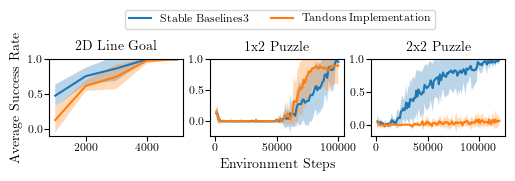

In [91]:
x = np.load(path_stable_2DGoal[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 50000)
x = x[idx]
fig, ax = plt.subplots(1, 3, figsize=(TEXTWIDTH +0.1, TEXTWIDTH * (5**.5 - 1.2) / (2*3)))
######################################################################################
# 2D Line Goal ###
##################
#ax[0, 0].set_ylim(top=100)
#ax[0, 0].plot(x, mean_return_stable_ri025, label="Stable Baselines3")
#ax[0, 0].fill_between(x, mean_return_stable_ri025 + std_return_stable_ri025, mean_return_stable_ri025 - std_return_stable_ri025, alpha=0.3)
#ax[0, 0].plot(x, mean_return_tandon, label="Tandons Implementation")
#ax[0, 0].fill_between(x, mean_return_tandon + std_return_tandon, mean_return_tandon - std_return_tandon, alpha=0.3)
#ax[0, 0].set_ylim(top=100)

ax[0].plot(x, mean_succ_stable_ri025, label="Stable Baselines3")
ax[0].fill_between(x, mean_succ_stable_ri025 + std_succ_stable_ri025, mean_succ_stable_ri025 - std_succ_stable_ri025, alpha=0.3)
ax[0].plot(x, mean_succ_tandon, label="Tandons Implementation")
ax[0].fill_between(x, mean_succ_tandon + std_succ_tandon, mean_succ_tandon - std_succ_tandon, alpha=0.3)
ax[0].set_ylim(top=1.)
ax[0].set_title("2D Line Goal")

######################################################################################
# 1x2 puzzle #####
##################

x = np.load(path_stable_1x2[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 100000)
x = x[idx]

returns_stable, succ_stable = gather_data(path_stable_1x2, x, idx)
returns_tandon, succ_tandon = gather_data(path_tandon_1x2, x, idx)

mean_return_stable, std_return_stable = compute_mean_std(returns_stable)
mean_succ_stable, std_succ_stable = compute_mean_std(succ_stable)

mean_return_tandon, std_return_tandon = compute_mean_std(returns_tandon)
mean_succ_tandon, std_succ_tandon = compute_mean_std(succ_tandon)

#ax[0, 1].plot(x, mean_return_stable, label="Stable Baselines3")
#ax[0, 1].fill_between(x, mean_return_stable + std_return_stable, mean_return_stable - std_return_stable, alpha=0.3)
#ax[0, 1].plot(x, mean_return_tandon, label="Tandons Implementation")
#ax[0, 1].fill_between(x, mean_return_tandon + std_return_tandon, mean_return_tandon - std_return_tandon, alpha=0.3)
#ax[0, 1].set_ylim(top=100)


ax[1].plot(x, mean_succ_stable, label="Stable Baselines3")
ax[1].fill_between(x, mean_succ_stable + std_succ_stable, mean_succ_stable - std_succ_stable, alpha=0.3)
ax[1].plot(x, mean_succ_tandon, label="Tandons Implementation")
ax[1].fill_between(x, mean_succ_tandon + std_succ_tandon, mean_succ_tandon - std_succ_tandon, alpha=0.3)
ax[1].set_ylim(top=1.)
ax[1].set_title("1x2 Puzzle")

######################################################################################
# 2x2 puzzle #####
##################

x = np.load(path_stable_2x2[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 120000)
x = x[idx]

returns_stable, succ_stable = gather_data(path_stable_2x2, x, idx)
returns_tandon, succ_tandon = gather_data(path_tandon_2x2, x, idx)

mean_return_stable, std_return_stable = compute_mean_std(returns_stable)
mean_succ_stable, std_succ_stable = compute_mean_std(succ_stable)

mean_return_tandon, std_return_tandon = compute_mean_std(returns_tandon)
mean_succ_tandon, std_succ_tandon = compute_mean_std(succ_tandon)

#ax[0, 2].plot(x, mean_return_stable, label="Stable Baselines3")
#ax[0, 2].fill_between(x, mean_return_stable + std_return_stable, mean_return_stable - std_return_stable, alpha=0.3)
#ax[0, 2].plot(x, mean_return_tandon, label="Tandons Implementation")
#ax[0, 2].fill_between(x, mean_return_tandon + std_return_tandon, mean_return_tandon - std_return_tandon, alpha=0.3)
#ax[0, 2].set_ylim(top=100)


ax[2].plot(x, mean_succ_stable, label="Stable Baselines3")
ax[2].fill_between(x, mean_succ_stable + std_succ_stable, mean_succ_stable - std_succ_stable, alpha=0.3)
ax[2].plot(x, mean_succ_tandon, label="Tandons Implementation")
ax[2].fill_between(x, mean_succ_tandon + std_succ_tandon, mean_succ_tandon - std_succ_tandon, alpha=0.3)
ax[2].set_ylim(top=1.)
ax[2].set_title("2x2 Puzzle")

#ax[0].set_xticklabels([])
#ax[1].set_xticklabels([])
#ax[2].set_xticklabels([])

for i in range(3):
        ax[i].locator_params(axis='y', nbins=3)

ax[1].set_xlabel('Environment Steps')
#ax[0, 0].set_ylabel('Average Return')
ax[0].set_ylabel('Average Success Rate')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.79,1.43))
plt.savefig("Comparison.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)#,
            #dpi=1000)
plt.show()

Every 1000 environment steps, we evaluated for 10 episodes and averaged the returns and success rate over them. We did 10 runs like this. In bold, we can see the mean of those runs. The shaded areas visualize the standard deviation. During training, we terminated an episode on change of symbolic state. However, during evaluation we did not do so but ended every episode after 100 steps. This way we can see via the return how long the actor took to reach the goal state in an episode.

Difference in starting to see Increase in success for 1x2 and 2x2 puzzle -> Boarders are the same for both puzzles. Thus, in the bigger puzzle there is less free space. In the small puzzle there is much exploration in the beginning. Because, there is a lot of free space agent has many episodes of exploration, where it does not get any reward in training, such that it does not learn much in the beginning. We observed that for Tandons implementation the policy seems to converge quicker and explores the space less well, leading to the poor performance in the 2x2 puzzle.

# **Comparison of FM Implementzations**

In [32]:
simple_path = ["fm_eval/fm_eval_empty_input_4skills_seed12345.npz", "fm_eval/fm_eval_empty_input_24skills_seed12345.npz"]
symstate_path = ["fm_eval/fm_eval_sym_input_4skills_seed12345.npz", "fm_eval/fm_eval_sym_input_24skills_seed12345.npz"]
lookup_path = ["fm_eval/fm_eval_lookup_4.npz", "fm_eval/fm_eval_lookup_24.npz"]

In [33]:
data_simple_4skills = np.load(simple_path[0], mmap_mode='r')
data_simple_24skills = np.load(simple_path[1], mmap_mode='r')
for k in data_simple_4skills.files:
    print(k, data_simple_4skills[k])
    
data_sym_4skills = np.load(symstate_path[0], mmap_mode='r')
data_sym_24skills = np.load(symstate_path[1], mmap_mode='r')
for k in data_sym_4skills.files:
    print(k, data_sym_4skills[k])

data_lookup_4skills = np.load(lookup_path[0], mmap_mode='r')
data_lookup_24skills = np.load(lookup_path[1], mmap_mode='r')

train_loss [2.19861579e+00 2.19025564e+00 2.16092658e+00 2.14294100e+00
 2.16801548e+00 2.08534288e+00 2.10319328e+00 2.04790664e+00
 2.05881596e+00 2.01656318e+00 1.94073582e+00 1.89707148e+00
 1.94866300e+00 1.93050897e+00 1.87598693e+00 1.86190605e+00
 1.85861707e+00 1.87730050e+00 1.92992711e+00 1.75491643e+00
 1.79930675e+00 1.68075550e+00 1.51129878e+00 1.54330468e+00
 1.53480613e+00 1.64837956e+00 1.61603320e+00 1.63204944e+00
 1.81597710e+00 1.57978368e+00 1.76610148e+00 1.72848022e+00
 1.52491701e+00 1.30189896e+00 1.45607853e+00 1.39089000e+00
 1.45157897e+00 1.13819444e+00 1.24882686e+00 1.16567731e+00
 1.10071266e+00 1.34255660e+00 1.15285242e+00 1.17299616e+00
 1.20218265e+00 1.07734573e+00 1.25830901e+00 1.05722928e+00
 1.14983511e+00 8.00257862e-01 9.06757057e-01 8.45373929e-01
 9.09728229e-01 7.97058761e-01 7.74187565e-01 7.37656772e-01
 5.63753545e-01 7.50777900e-01 6.82689130e-01 9.60978329e-01
 6.46160364e-01 7.44058609e-01 8.71160686e-01 6.40887201e-01
 5.78196108e-

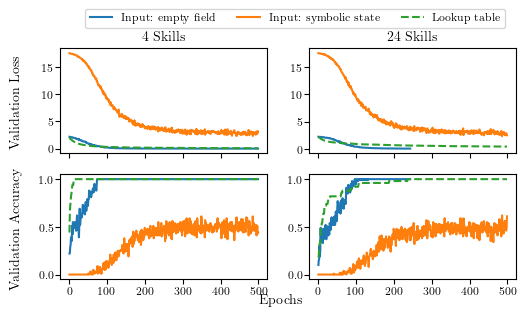

In [38]:
fig, ax = plt.subplots(2,2, sharex=True, figsize=(TEXTWIDTH +0.1, TEXTWIDTH * (5**.5 - 1.2) / 2))

ax[0, 0].plot(np.arange(data_simple_4skills["test_loss"].shape[0]), data_simple_4skills["test_loss"], label="Input: empty field")
ax[0, 0].plot(np.arange(data_simple_4skills["test_loss"].shape[0]), data_sym_4skills["test_loss"], label="Input: symbolic state")
ax[0, 0].plot(np.arange(data_lookup_4skills["test_loss"].shape[0]), data_lookup_4skills["test_loss"], "--", label="Lookup table")

ax[1, 0].plot(np.arange(data_simple_4skills["test_acc"].shape[0]), data_simple_4skills["test_acc"], label="Input: empty field")
ax[1, 0].plot(np.arange(data_simple_4skills["test_acc"].shape[0]), data_sym_4skills["test_acc"], label="Input: symbolic state")
ax[1, 0].plot(np.arange(data_lookup_4skills["test_acc"].shape[0]), data_lookup_4skills["test_acc"], "--", label="Lookup table")
ax[0, 0].set_title("Multiple skill effects")

ax[0, 1].plot(np.arange(data_simple_24skills["test_loss"].shape[0]), data_simple_24skills["test_loss"], label="Input:empty field")
ax[0, 1].plot(np.arange(data_sym_24skills["test_loss"].shape[0]), data_sym_24skills["test_loss"], label="Input: symbolic state")
ax[0, 1].plot(np.arange(data_lookup_24skills["test_loss"].shape[0]), data_lookup_24skills["test_loss"], "--", label="Lookup table")

ax[1, 1].plot(np.arange(data_simple_24skills["test_acc"].shape[0]), data_simple_24skills["test_acc"], label="Input: empty field")
ax[1, 1].plot(np.arange(data_sym_24skills["test_acc"].shape[0]), data_sym_24skills["test_acc"], label="Input: symbolic state")
ax[1, 1].plot(np.arange(data_lookup_24skills["test_acc"].shape[0]), data_lookup_24skills["test_acc"], "--", label="Lookup table")
ax[0, 1].set_title("Single skill effect")

fig.text(0.5, 0.03, 'Epochs', ha='center')
fig.text(0.04, 0.28, 'Validation Accuracy', va='center', rotation='vertical')
fig.text(0.04, 0.7, 'Validation Loss', va='center', rotation='vertical')

ax[0, 0].set_title("4 Skills")
ax[0, 1].set_title("24 Skills")

handles, labels = ax[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.89,1.03))
plt.savefig("Fm_Comparison.pdf",
            bbox_inches='tight', dpi=plt.gcf().dpi)
plt.show()


In [ ]:
# plot perforamnce of fm with sym input dependent on batch size
plt.subplots()